### Importing data

In [87]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (20)')

In [89]:
df

,Успех,"Торговельна площа, кв. м.",Этаж,Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,не успішний,9.00,1,2,старий,3.0,659.0,1.56,15610.0,11298.0,1,1,1,0,1
1,не успішний,22.00,1,2,старий,4.1,1518.0,2.03,12600.0,18903.0,1,0,0,0,1
2,не успішний,13.00,1,2,старий,3.0,476.0,1.81,12600.0,20252.0,0,0,0,0,1
3,не успішний,18.00,1,2,старий,3.0,1310.0,2.18,13930.0,2540.0,1,1,1,1,1
4,не успішний,25.00,1,2,новий,4.0,2029.0,1.63,16030.0,6896.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,1,6,новий,4.0,6884.0,1.89,8750.0,42781.0,0,0,0,0,1
65,успішний,21.50,1,4,новий,2.3,4721.0,1.85,13300.0,32400.0,0,0,0,0,0
66,не успішний,115.23,1,2,старий,3.0,3286.0,1.99,11060.0,29287.0,1,0,0,0,1
67,не успішний,34.80,1,3,новий,4.3,3963.0,1.73,11900.0,5705.0,0,0,0,0,0


In [90]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Торговельна площа, кв. м.         69 non-null     float64
 2   Количество сотрудников в штаті    69 non-null     int64  
 3   Тип                               69 non-null     object 
 4   Рейтинг в гуглі                   69 non-null     float64
 5   Количество чеков                  62 non-null     float64
 6   Среднее количество единиц в чеке  62 non-null     float64
 7   Середній дохід населення          64 non-null     float64
 8   Населення середнє                 64 non-null     float64
 9   Магазин біля дому                 69 non-null     int64  
 10  Фастфуд                           69 non-null     int64  
 11  Кава на виніс                     69 non-null     int64  
 12  Піцерія   

### Missing data

In [92]:
df.dtypes

Успех                                object
Торговельна площа, кв. м.           float64
Количество сотрудников в штаті        int64
Тип                                  object
Рейтинг в гуглі                     float64
Количество чеков                    float64
Среднее количество единиц в чеке    float64
Середній дохід населення            float64
Населення середнє                   float64
Магазин біля дому                     int64
Фастфуд                               int64
Кава на виніс                         int64
Піцерія                               int64
Магістральна вулиця                   int64
dtype: object

In [93]:
df.isnull().sum()

Успех                               0
Торговельна площа, кв. м.           0
Количество сотрудников в штаті      0
Тип                                 0
Рейтинг в гуглі                     0
Количество чеков                    7
Среднее количество единиц в чеке    7
Середній дохід населення            5
Населення середнє                   5
Магазин біля дому                   0
Фастфуд                             0
Кава на виніс                       0
Піцерія                             0
Магістральна вулиця                 0
dtype: int64

In [94]:
#!pip install sklearn

In [95]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Количество чеков']] = imputer_mean.fit_transform(df[['Количество чеков']]).round()
df[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(df[['Среднее количество единиц в чеке']]).round()
df[['Середній дохід населення']] = imputer_mean.fit_transform(df[['Середній дохід населення']]).round()
df[['Населення середнє']] = imputer_mean.fit_transform(df[['Населення середнє']]).round()

In [96]:
df.isnull().sum()

Успех                               0
Торговельна площа, кв. м.           0
Количество сотрудников в штаті      0
Тип                                 0
Рейтинг в гуглі                     0
Количество чеков                    0
Среднее количество единиц в чеке    0
Середній дохід населення            0
Населення середнє                   0
Магазин біля дому                   0
Фастфуд                             0
Кава на виніс                       0
Піцерія                             0
Магістральна вулиця                 0
dtype: int64

### Outliers

In [97]:
df.describe()

,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,3.652174,3.810145,4079.768116,1.971014,11990.391304,19976.913043,0.304348,0.202899,0.217391,0.086957,0.449275
std,21.704293,1.607209,0.695605,2210.847031,0.240772,2474.008472,13007.369873,0.463502,0.405104,0.415493,0.283836,0.501065
min,4.000000,2.000000,1.800000,476.000000,1.000000,0.000000,1362.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,3.000000,2344.000000,2.000000,11060.000000,9085.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,4.000000,4.000000,4080.000000,2.000000,12180.000000,19977.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,4.000000,4.300000,4826.000000,2.000000,13300.000000,30268.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,119.300000,8.000000,5.000000,9687.000000,3.000000,16100.000000,54688.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [99]:
# Outliers
df = outliers(df)
df

,Успех,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,не успішний,9.000000,2,старий,3.0,659.0,2.0,15610.0,11298.0,1,1,1,0.000000,1
1,не успішний,22.000000,2,старий,4.1,1518.0,2.0,12600.0,18903.0,1,0,0,0.000000,1
2,не успішний,13.000000,2,старий,3.0,476.0,2.0,12600.0,20252.0,0,0,0,0.000000,1
3,не успішний,18.000000,2,старий,3.0,1310.0,2.0,13930.0,2540.0,1,1,1,0.938463,1
4,не успішний,25.000000,2,новий,4.0,2029.0,2.0,16030.0,6896.0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.780000,6,новий,4.0,6884.0,2.0,8750.0,42781.0,0,0,0,0.000000,1
65,успішний,21.500000,4,новий,2.3,4721.0,2.0,13300.0,32400.0,0,0,0,0.000000,0
66,не успішний,99.985025,2,старий,3.0,3286.0,2.0,11060.0,29287.0,1,0,0,0.000000,1
67,не успішний,34.800000,3,новий,4.3,3963.0,2.0,11900.0,5705.0,0,0,0,0.000000,0


### Encoding

In [100]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,3,"[старий, новий, cтарий]",object


In [101]:
# Encoding
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
type = {'старий':0,'cтарий':0,'новий':1}
df['Тип'] = df['Тип'].map(type)
df

,Успех,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,0,9.000000,2,0,3.0,659.0,2.0,15610.0,11298.0,1,1,1,0.000000,1
1,0,22.000000,2,0,4.1,1518.0,2.0,12600.0,18903.0,1,0,0,0.000000,1
2,0,13.000000,2,0,3.0,476.0,2.0,12600.0,20252.0,0,0,0,0.000000,1
3,0,18.000000,2,0,3.0,1310.0,2.0,13930.0,2540.0,1,1,1,0.938463,1
4,0,25.000000,2,1,4.0,2029.0,2.0,16030.0,6896.0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.780000,6,1,4.0,6884.0,2.0,8750.0,42781.0,0,0,0,0.000000,1
65,1,21.500000,4,1,2.3,4721.0,2.0,13300.0,32400.0,0,0,0,0.000000,0
66,0,99.985025,2,0,3.0,3286.0,2.0,11060.0,29287.0,1,0,0,0.000000,1
67,0,34.800000,3,1,4.3,3963.0,2.0,11900.0,5705.0,0,0,0,0.000000,0


### Correlation

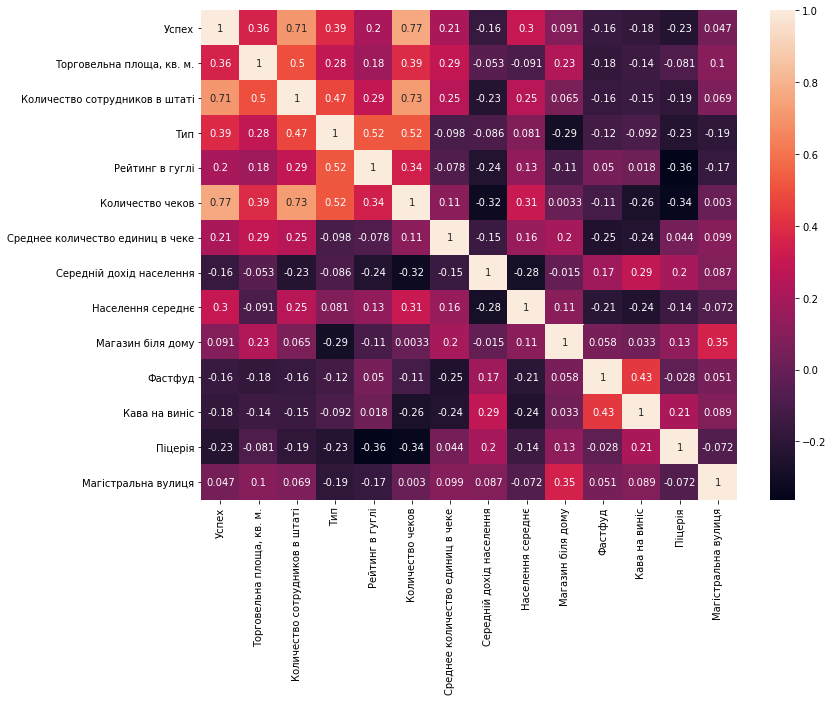

In [102]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [103]:
# Splitting the dataset into the Training set and Test set
f = ['Количество сотрудников в штаті','Количество чеков']
X = df[f]
y = df['Успех']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [104]:
df.to_csv('dataset.csv', sep=',', index=False)

In [105]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection


In [106]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.183521
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.724     
Dependent Variable: Успех            AIC:              24.1873   
Date:               2022-01-12 18:26 BIC:              28.2020   
No. Observations:   55               Log-Likelihood:   -10.094   
Df Model:           1                LL-Null:          -36.572   
Df Residuals:       53               LLR p-value:      3.4095e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1       2.1086      1.1952    1.7642    0.0777    -0.2340    4.4512
x2       4.9895      2.5269    1.9745    0.0483     0.

In [107]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

2
[ True  True]
[1 1]


In [108]:
# Leaving only Selected Features
X_train_select=X_train[:,[True,  True]]
X_test_select=X_test[:,[True,  True]]

In [109]:
X_train_select

array([[-9.98442771e-01, -1.27615748e+00],
       [ 1.36346486e+00,  1.19365704e+00],
       [-9.98442771e-01, -9.49844239e-01],
       [ 2.54441867e+00,  1.67382311e+00],
       [ 1.82511044e-01,  5.42392095e-01],
       [-4.07965863e-01, -7.21115534e-02],
       [ 1.36346486e+00,  1.10198072e+00],
       [-9.98442771e-01, -3.79363378e-01],
       [ 1.82511044e-01,  2.27878780e-01],
       [ 1.82511044e-01, -1.53575577e+00],
       [-4.07965863e-01,  3.54492772e-02],
       [ 1.82511044e-01,  2.26517251e-01],
       [ 1.82511044e-01, -9.57105730e-01],
       [ 1.36346486e+00,  2.52568674e+00],
       [ 1.36346486e+00,  1.82812979e+00],
       [-9.98442771e-01, -1.37373376e+00],
       [ 1.82511044e-01, -7.22922655e-01],
       [ 1.82511044e-01,  3.19555100e-01],
       [ 1.82511044e-01,  2.71901567e-01],
       [ 1.36346486e+00,  1.57034687e+00],
       [-9.98442771e-01, -1.90119029e-02],
       [-9.98442771e-01, -2.43664271e-01],
       [ 1.82511044e-01, -1.90119029e-02],
       [-9.

In [110]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

### Classification Tree

In [111]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

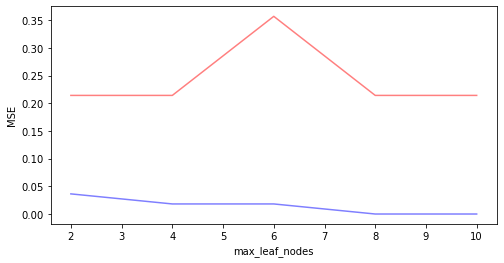

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [113]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [114]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test).round(3)

0.786

In [115]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 3]
 [0 4]]


### Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


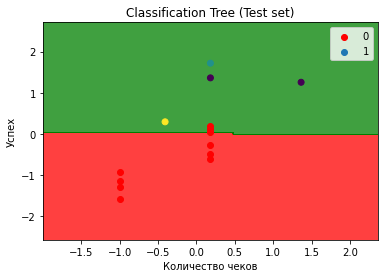

In [116]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Успех')
plt.legend()
plt.show()

### Forest

In [117]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

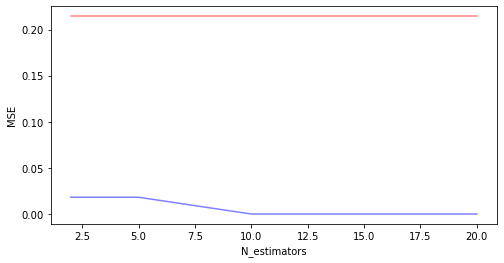

In [118]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [119]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

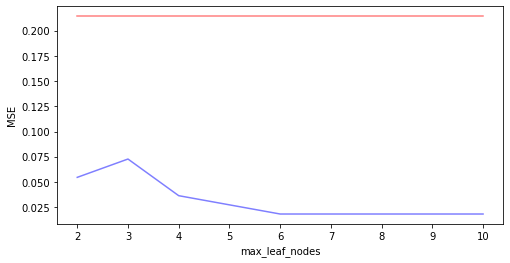

In [120]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 3, 4, 6, 8, 10])

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, max_leaf_nodes = 3, random_state = 10).fit(X_train, y_train)

In [122]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.786

In [123]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[7 3]
 [0 4]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


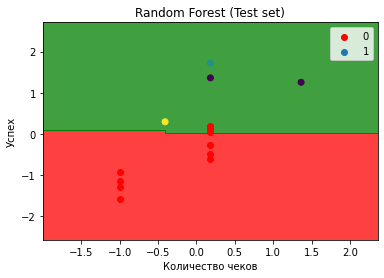

In [124]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Успех')
plt.legend()
plt.show()

In [125]:
ct.score(X_test,y_test).round(3) # tree

0.786

In [126]:
rf.score(X_test,y_test).round(3) # Forest

0.786

In [127]:
print(cm) # tree
print()
print(cm2) # Forest

[[7 3]
 [0 4]]

[[7 3]
 [0 4]]


Точность моделей одинаковая

Решения моделей одинаковы


### Hierarchical clustering

In [128]:
df = pd.read_csv('dataset.csv', sep=',')
df

,Успех,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,0,9.000000,2,0,3.0,659.0,2.0,15610.0,11298.0,1,1,1,0.000000,1
1,0,22.000000,2,0,4.1,1518.0,2.0,12600.0,18903.0,1,0,0,0.000000,1
2,0,13.000000,2,0,3.0,476.0,2.0,12600.0,20252.0,0,0,0,0.000000,1
3,0,18.000000,2,0,3.0,1310.0,2.0,13930.0,2540.0,1,1,1,0.938463,1
4,0,25.000000,2,1,4.0,2029.0,2.0,16030.0,6896.0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.780000,6,1,4.0,6884.0,2.0,8750.0,42781.0,0,0,0,0.000000,1
65,1,21.500000,4,1,2.3,4721.0,2.0,13300.0,32400.0,0,0,0,0.000000,0
66,0,99.985025,2,0,3.0,3286.0,2.0,11060.0,29287.0,1,0,0,0.000000,1
67,0,34.800000,3,1,4.3,3963.0,2.0,11900.0,5705.0,0,0,0,0.000000,0


In [129]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Торговельна площа, кв. м.','Количество сотрудников в штаті','Тип','Рейтинг в гуглі','Количество чеков','Среднее количество единиц в чеке','Середній дохід населення','Населення середнє','Магазин біля дому','Фастфуд','Кава на виніс','Піцерія','Магістральна вулиця']).round()

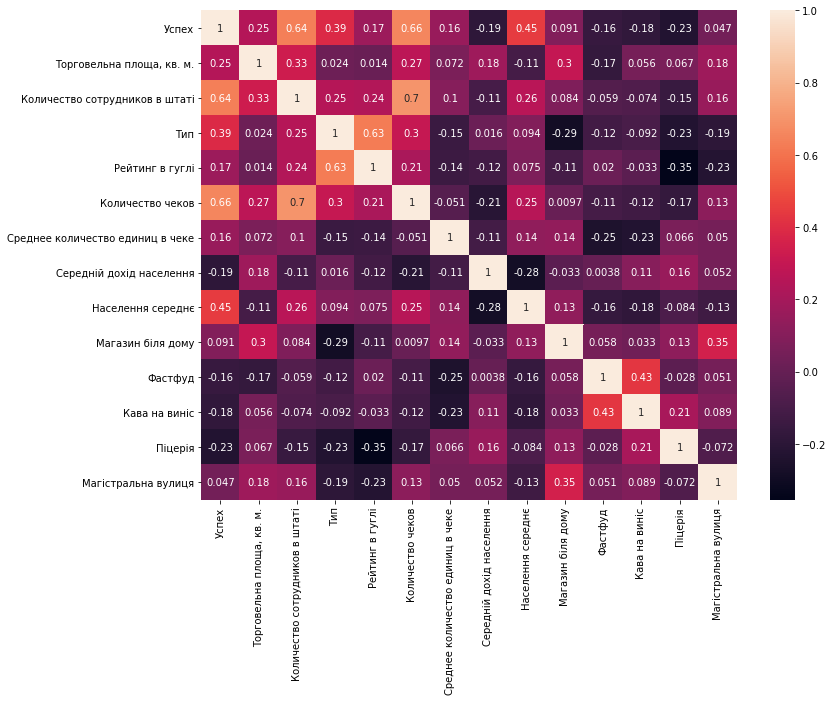

In [130]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

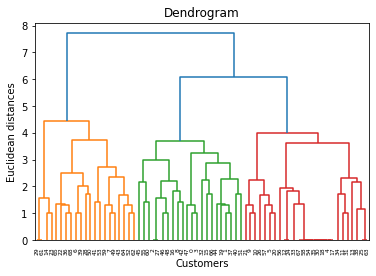

In [131]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model


In [132]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [133]:
hc

array([2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 0], dtype=int64)

### Feature Reduction

In [134]:
# Less features
X = df.iloc[:, [0, 2, 5, 8]]

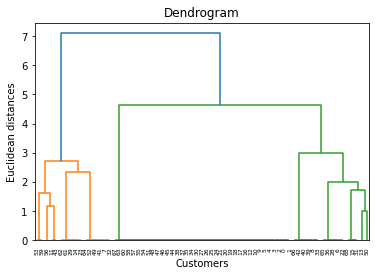

In [135]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [136]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [137]:
hc

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

### K-Means Clustering 

In [138]:
df = pd.read_csv('dataset.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Торговельна площа, кв. м.','Количество сотрудников в штаті','Тип','Рейтинг в гуглі','Количество чеков','Среднее количество единиц в чеке','Середній дохід населення','Населення середнє','Магазин біля дому','Фастфуд','Кава на виніс','Піцерія','Магістральна вулиця']).round()


,Успех,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
65,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
67,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Number of clusters

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


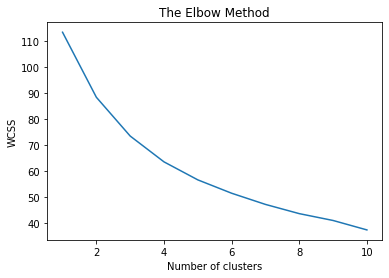

In [139]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

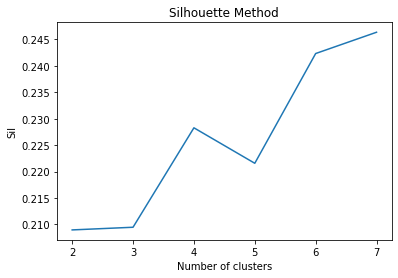

2:0.20893714943517663
3:0.20944285012833638
4:0.22827426755463467
5:0.22155646913722718
6:0.2423411522854825
7:0.24637265253559623


In [140]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [141]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Торговельна площа, кв. м.','Количество сотрудников в штаті','Тип','Рейтинг в гуглі','Количество чеков','Среднее количество единиц в чеке','Середній дохід населення','Населення середнє','Магазин біля дому','Фастфуд','Кава на виніс','Піцерія','Магістральна вулиця']).round(2)

,Успех,"Торговельна площа, кв. м.",Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Среднее количество единиц в чеке,Середній дохід населення,Населення середнє,Магазин біля дому,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця
0,-0.0,0.26,0.13,0.55,0.60,0.25,0.53,0.67,0.29,0.27,0.25,0.27,0.14,0.43
1,1.0,0.41,0.53,0.92,0.69,0.63,0.58,0.61,0.45,0.36,0.12,0.12,0.00,0.48


### Feature Reduction

In [142]:
# Less features
X = df[:, [0, 2, 5, 8]]

In [143]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в штаті','Количество чеков','Населення середнє']).round()

,Успех,Количество сотрудников в штаті,Количество чеков,Населення середнє
0,-0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0


In [144]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.675

Результаты иерархической кластеризации пересекаются на 67,5 % с результатами кластеризации на основе К-средних